<a href="https://colab.research.google.com/github/gmacario/learning-python/blob/master/jupyter/fcc-tutorial/fcc_opencv_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Tutorial - Develop Computer Vision Apps in the Cloud with Python

YouTube Video: <https://www.youtube.com/watch?v=iXNsAYOTzgM>

In [ ]:
%cd /content
! [ ! -d opencvTutorial ] && git clone https://github.com/misbah4064/opencvTutorial.git
%cd opencvTutorial/
! git pull
from IPython.display import clear_output
clear_output()

## Part 1: OpenCV Basics

### Lesson 1: Changing Image's Color Profiles

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# dir(cv2_imshow)

# Read image
image = cv2.imread("images/color.jpg")
cv2_imshow(image)

In [ ]:
# Get the image properties

print(image.shape)
# --> (476 rows, 640 columns, 3 channels) --> Colorful image

In [ ]:
# Make the image grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
print(gray.shape)

In [ ]:
cv2_imshow(gray)

In [ ]:
# HSV (Hue, Saturation, Variance) image --> All colors under one channel
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
hsv_image.shape
cv2_imshow(hsv_image)

### Lesson 2: Edge Detection

In [ ]:
import cv2
from google.colab.patches import cv_imshow
import numpy as np

image = cv2.imread("images/color.jpg")
# cv2_imshow(image)

# Canny Edge Detector - starts from a grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray, 150, 200)

#cv2_imshow(canny_image)

# Erosion and Dilation
kernel = np.ones((5, 5), np.uint8)

# First let's do ilation
dilate_image = cv2.dilate(canny_image, kernel, iterations=1)
# cv2_imshow(dilate_image)

# Then Erosion
erode_image = cv2.erode(dilate_image, kernel, iterations=1)
# cv2_imshow(erode_image)

display = np.hstack((canny_image, dilate_image, erode_image))
cv2_imshow(display)


### Lesson 3: Image Manipulation and Noise Removal

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read image
image_lion = cv2.imread("images/lion.jpg")
# cv2_imshow(image_lion)

# Denoising
# See https://docs.opencv.org/4.x/d5/d69/tutorial_py_non_local_means.html
dst = cv2.fastNlMeansDenoisingColored(image_lion, None, 50, 20, 7, 15)

# cv2_imshow(dst)

display = np.hstack((image_lion, dst))
# print(display.shape)
cv2_imshow(display)

### Lesson 4: Drawing Shapes and Writing Text on Images

(Continue from 41:57 of video <https://www.youtube.com/watch?v=iXNsAYOTzgM>)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Create image from scratch
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
#img.dtype
#img.size

# Drawing Function
# Draw a green circle
cv2.circle(img, (100,100), 50, (0,255,0), 5)
# Draw a red rectangle
cv2.rectangle(img, (200,200), (400,500), (0,0,255), 5)
# Draw a blue line
cv2.line(img, (160,160), (359,29), (255,0,0), 3)
# Write a text
cv2.putText(img, "OpenCV", (160,160), cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,255), 2)
# Display the image
cv2_imshow(img)

## Part 2: Intermediate Exercises


### Lesson 1: Color Detection

(Continue from 1:00:00 of video https://www.youtube.com/watch?v=iXNsAYOTzgM)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the file into a BGR image (blue, green and red channels)
img_shapes = cv2.imread("images/shapes.png")
# cv2_imshow(img_shapes)

# Convert BGR to HSV
hsv_image = cv2.cvtColor(img_shapes, cv2.COLOR_BGR2HSV)

# Red Color
# lower_hue = np.array([0,0,0])
# upper_hue = np.array([20,255,255])

# Yellow Color
lower_hue = np.array([21,0,0])
upper_hue = np.array([45,255,255])

# Green Color
# lower_hue = np.array([46,0,0])
# upper_hue = np.array([91,255,255])

# Blue Color (Triangle)
# lower_hue = np.array([65,0,0])
# upper_hue = np.array([110,255,255])

# You can search for "OpenCV Trackbar"

mask = cv2.inRange(hsv_image, lower_hue, upper_hue)
#cv2_imshow(mask)

result = cv2.bitwise_and(img_shapes, img_shapes, mask=mask)
cv2_imshow(result)


### Lesson 2: Face Detection

(Continue from 1:21:00 of video https://www.youtube.com/watch?v=iXNsAYOTzgM)

DEBUG: face_cascade=< cv2.CascadeClassifier 0x7f7727338a30>
DEBUG: faces=[[208  73 161 161]]


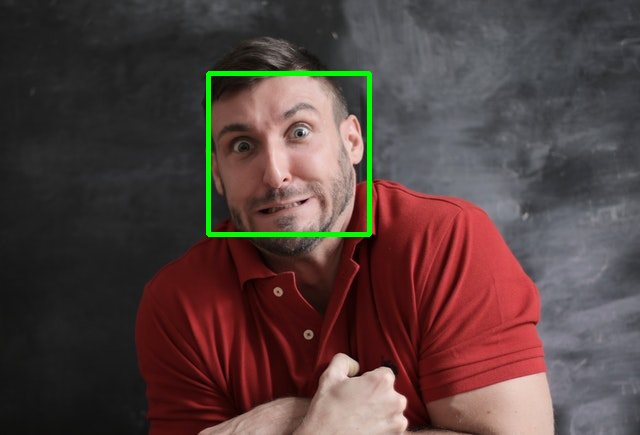

In [48]:
import cv2
# import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier("files/haarcascade_frontalface_default.xml")
print(f"DEBUG: face_cascade={face_cascade}")

img = cv2.imread("images/person.jpg")
# img = cv2.imread("images/group.jpg")

# Convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(f"DEBUG: faces={faces}")

for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)

cv2_imshow(img)

### Lesson 3: Shape Detection

(Continue from 1:38:00 of video https://www.youtube.com/watch?v=iXNsAYOTzgM)

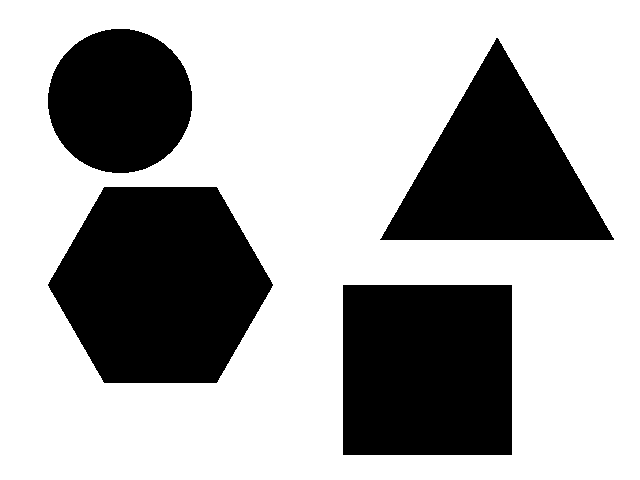

In [58]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("images/shapes.png")
# print(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)

(ret, thresh) = cv2.threshold(gray, 50, 255, 1)
cv2_imshow(thresh)
contours, h = cv2.findContours(thresh, 1, 2)

contours?
for cnts in contours:
  pass

# cv2_imshow(contours)